<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/0912.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

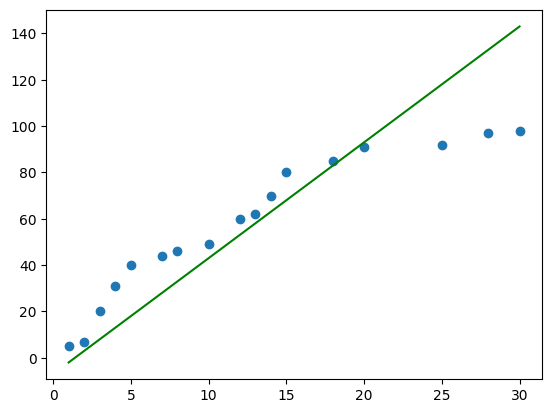

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 7, color='g')
plt.show()

In [ ]:
# sklearn을 이용해서 간단한 simple linear regression을 구현
# 필요한 module을 import

import numpy as np # 데이터를 2차원 matrix로 표현하기 위해 사용(차원 형태로 표현하기 위해 사용)
from sklearn import linear_model

# Training Data Set
# x_data(feature, 독립변수)는 당연히 matrix로 표현, 그리고 x_data는 feature가 1개
# t_data(target, label, 종속변수) 2차원 matrix로 표현

x_data = np.array([1, 2, 3 ,4, 5]).reshape(5, 1)
print(x_data)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)
print(t_data)

# linear regression model을 생성
sklearn_model = linear_model.LinearRegression() # LinearRegression model을 생성(지금은 비었음)

# Training Data Set을 이용해서 Model을 학습
sklearn_model.fit(x_data, t_data)

# 상식적으로 생각했을 때 우리 model은 아마도 y = 2x + 1, Y = XW + b

# 회기계수부터 구하기 (W, b)
print('Weight : {}, bias : {}'.format(sklearn_model.coef_, sklearn_model.intercept_))

# 학습이 다 끝나면 이제 prediction(예측)을 함
predict_value = sklearn_model.predict([[10], [20]])
print(predict_value)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]
Weight : [[2.]], bias : [1.]
[[21.]
 [41.]]


In [ ]:
# TensorFlow 구현

# 필요한 module import

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense   # Flatten은 input layer, Dense는 output layer
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1, 2, 3 ,4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

# Model 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape = (1, )))  # 독립변수가 하나라서 (1, )
keras_model.add(Dense(units = 1, activation = 'linear')) #  activation 기본이 linear

# Model 설정
keras_model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse') # learning_rate는 하이퍼 파라미터로 적당값을 찾아야한다, 1e-2 = 0.01

# Model 학습
keras_model.fit(x_data, t_data, epochs = 5000, verbose = 0) # verbose는 학습하는 과정 출력 할건지

# Model을 이용한 예측
keras_result = keras_model.predict([[10], [20]])
print(keras_result)

1/1 [==============================] - 0s 75ms/step
[[21.000032]
 [41.000084]]
